In [1]:
%pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

# Load CSV
df = pd.read_csv("multi_run_execution_times.csv")

print("\nLoaded Data:")
print(df)



Loaded Data:
     Language  Run1  Run2  Run3  Run4  Run5  Run6  Run7  Run8  Run9  Run10
0          Go  2138  2113  2130  2142  2127  2135  2115  2118  2124   2137
1        Java  2035  2034  1021  2047  1034  1036  1035  2041  1039   2048
2           C  2042  2049  2039  2057  2057  2041  1036  1033  2044   2047
3         C++  2042  1039  2040  2040  2048  1039  2045  2037  1035   1022
4      Python  1034  1050  1047  1033  2050  1037  2079  2040  2045   1041
5        Ruby  2040  2056  2048  2026  2051  1025  2051  2030  1032   1044
6  JavaScript  2040  2042  1036  1041  1034  1035  2046  1048  1029   1041
7         PHP  1030  1048  1044  1034  1032  1039  1041  1045  1038   1037
8        Perl  1035  1033  1031  1019  1032  1021  1034  1041  1032   1038
9       Shell  8104  6042  5057  8106  5068  6075  5069  5087  5046   5057


In [4]:
# Extract run columns
run_cols = [col for col in df.columns if col.startswith("Run")]

# Compute average execution time
df["Average"] = df[run_cols].mean(axis=1)

# Sort by speed (ascending time = faster)
ranked = df.sort_values("Average")

print("\nSpeed Ranking:")
print(ranked[["Language", "Average"]])



Speed Ranking:
     Language  Average
8        Perl   1031.6
7         PHP   1038.8
6  JavaScript   1339.2
4      Python   1445.6
1        Java   1537.0
3         C++   1638.7
5        Ruby   1740.3
2           C   1844.5
0          Go   2127.9
9       Shell   5871.1


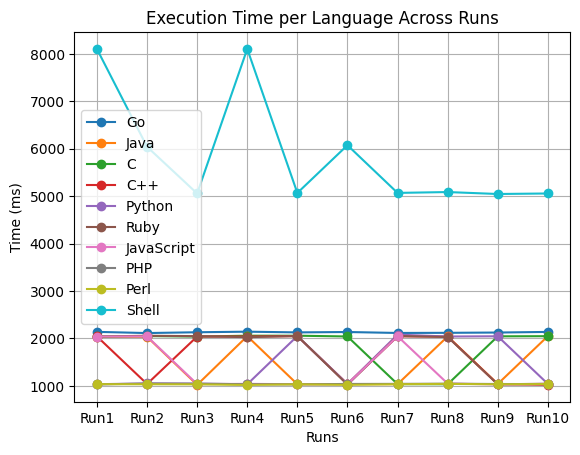

In [5]:

# ---- Plot 1: Execution Time Across Runs ----
plt.figure()
for i, row in df.iterrows():
    plt.plot(run_cols, row[run_cols], marker="o", label=row["Language"])

plt.title("Execution Time per Language Across Runs")
plt.xlabel("Runs")
plt.ylabel("Time (ms)")
plt.legend()
plt.grid(True)
plt.show()


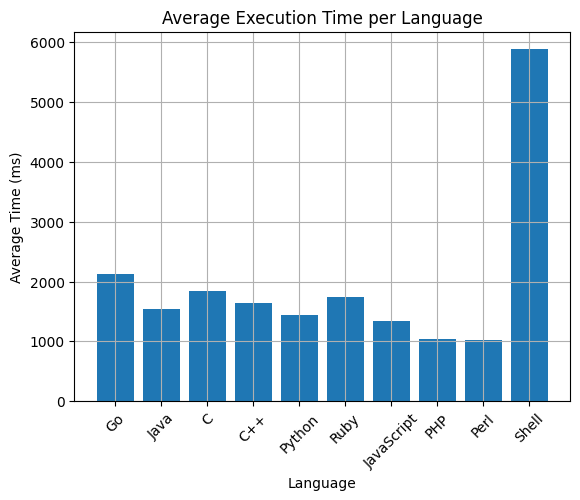

In [6]:

# ---- Plot 2: Average Execution Time Comparison ----
plt.figure()
plt.bar(df["Language"], df["Average"])
plt.title("Average Execution Time per Language")
plt.xlabel("Language")
plt.ylabel("Average Time (ms)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


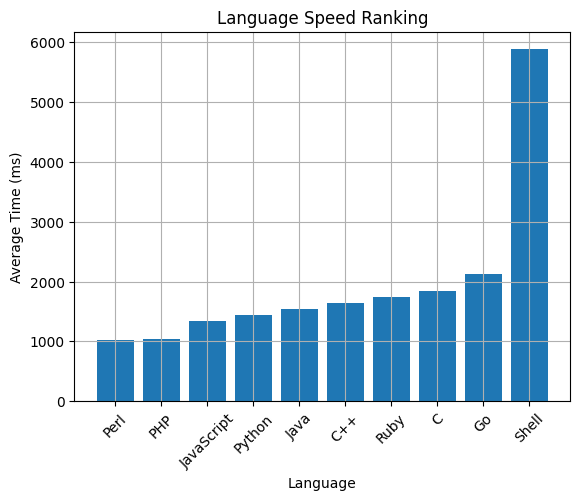

In [7]:

# ---- Plot 3: Speed Ranking (Fastest → Slowest) ----
plt.figure()
plt.bar(ranked["Language"], ranked["Average"])
plt.title("Language Speed Ranking")
plt.xlabel("Language")
plt.ylabel("Average Time (ms)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [8]:

# Stability Analysis: Standard Deviation of Execution Times
df["StdDev"] = df[run_cols].std(axis=1)
print("\nStability Analysis:")
print(df[["Language", "Average", "StdDev"]])



Stability Analysis:
     Language  Average       StdDev
0          Go   2127.9    10.224698
1        Java   1537.0   531.300710
2           C   1844.5   426.952053
3         C++   1638.7   520.687163
4      Python   1445.6   523.320212
5        Ruby   1740.3   487.734229
6  JavaScript   1339.2   485.466282
7         PHP   1038.8     5.827140
8        Perl   1031.6     6.834553
9       Shell   5871.1  1245.474336


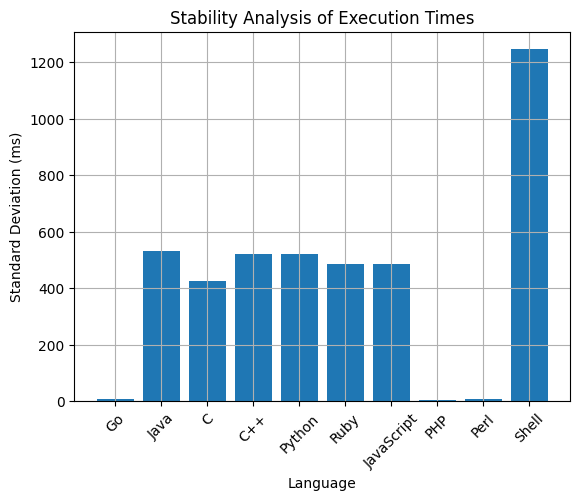

In [9]:
# Plot 4: Stability Analysis
plt.figure()
plt.bar(df["Language"], df["StdDev"])
plt.title("Stability Analysis of Execution Times")
plt.xlabel("Language")
plt.ylabel("Standard Deviation (ms)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
